In [144]:
# author: Yuman Lin

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf 

data = pd.read_csv("SPY.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-21,201.729996,203.940002,197.520004,197.830002,179.102432,346588500
1,2015-08-24,187.490005,197.479996,182.399994,189.500000,171.561005,507244300
2,2015-08-25,195.429993,195.449997,186.919998,187.270004,169.542130,369833100
3,2015-08-26,192.080002,194.789993,188.369995,194.460007,176.051483,339257000
4,2015-08-27,197.020004,199.419998,195.210007,199.270004,180.406158,274143900


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2020-08-17,337.940002,338.339996,336.850006,337.910004,337.910004,35481000
1256,2020-08-18,338.339996,339.100006,336.609985,338.640015,338.640015,38733900
1257,2020-08-19,339.049988,339.609985,336.619995,337.230011,337.230011,68054200
1258,2020-08-20,335.359985,338.799988,335.220001,338.279999,338.279999,42207800
1259,2020-08-21,337.920013,339.720001,337.549988,339.480011,339.480011,55106600


In [4]:
daily_return = (data["Adj Close"][1:].values - data["Adj Close"][:-1].values)/data["Adj Close"][:-1].values
daily_return

array([-0.04210678, -0.01176768,  0.03839372, ..., -0.00416373,
        0.00311357,  0.00354739])

In [5]:
data.shape

(1260, 7)

In [6]:
annual_vol = []
for i in range(0, 1260-5):
    sum_daily_return = daily_return[0+i]**2 + daily_return[1+i]**2 + daily_return[2+i]**2 + daily_return[3+i]**2 + daily_return[4+i]**2
    volatility = np.sqrt(sum_daily_return) * np.sqrt(52)
    annual_vol.append(volatility)

In [7]:
annual_vol

[0.45592029672975504,
 0.34505427774992525,
 0.3977284773159136,
 0.31665531024962623,
 0.26169069697600955,
 0.2835423882978809,
 0.3314263444172873,
 0.2698419113666229,
 0.23583847955906415,
 0.23804828536917888,
 0.21323350824440043,
 0.14405290905520782,
 0.12393334240260588,
 0.11866955918743446,
 0.16399528223405938,
 0.16603360039135134,
 0.16793972009795496,
 0.15630378615674395,
 0.157632266862328,
 0.10471644102994657,
 0.20574458268392778,
 0.1832704255870777,
 0.22706411458768722,
 0.22634548104245888,
 0.25066242521477017,
 0.21574089607210495,
 0.2171100268731147,
 0.18033863826061552,
 0.19080105594479144,
 0.1575457937455646,
 0.09165464596272253,
 0.09927420893969562,
 0.08696133771911108,
 0.12483911547204991,
 0.12900098764959345,
 0.12887015604961558,
 0.12094320737085079,
 0.12423078851651975,
 0.13421826740480924,
 0.15227497427004544,
 0.1532616938717891,
 0.1536175048684731,
 0.16830001424601382,
 0.11619472119315866,
 0.09065871059746461,
 0.12322226399901422,

In [8]:
df = data.drop([0,1,2,3,4], axis = 0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800


In [9]:
daily_return_new = daily_return[4:]
daily_return_new

array([ 5.01590417e-05, -8.07911941e-03, -2.98478057e-02, ...,
       -4.16372531e-03,  3.11356631e-03,  3.54739270e-03])

In [10]:
df.shape

(1255, 7)

In [11]:
len(daily_return_new)

1255

In [12]:
len(annual_vol)

1255

In [13]:
df["Daily Return"] = daily_return_new
df["Annual Volatility"] = annual_vol
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691


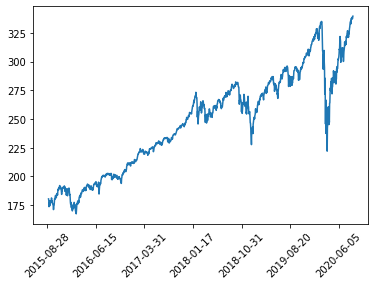

In [14]:
plt.plot(df["Adj Close"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.show()

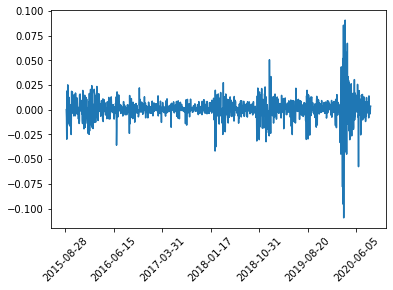

In [15]:
plt.plot(df["Daily Return"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.show()

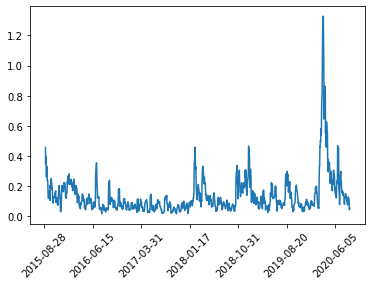

In [16]:
plt.plot(df["Annual Volatility"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.show()

In [17]:
df.shape

(1255, 9)

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691


In [ ]:
# add new columns


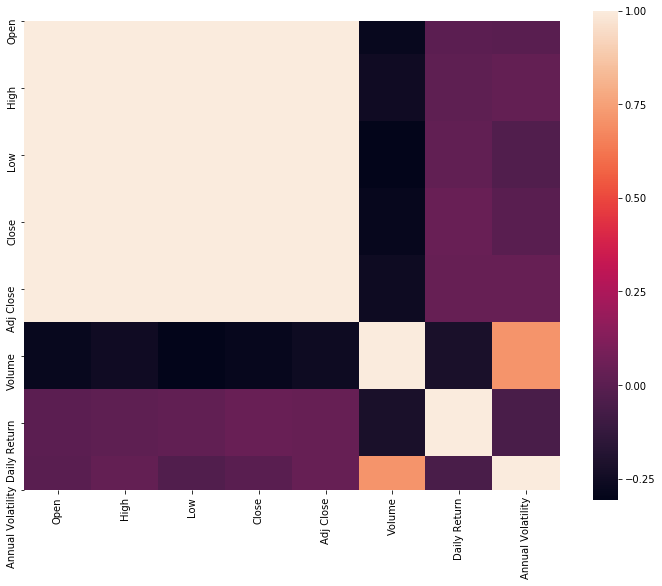

In [19]:
#correlation matrix
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)

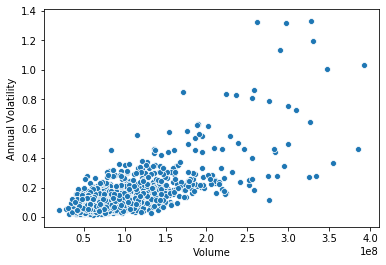

In [20]:
# scatter plot
sns.scatterplot(x="Volume", y="Annual Volatility", data=df)

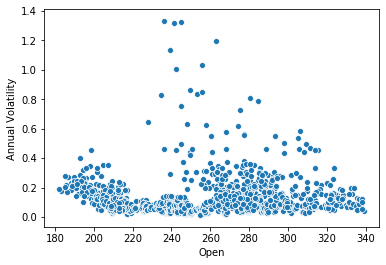

In [21]:
# scatter plot
sns.scatterplot(x="Open", y="Annual Volatility", data=df)

In [22]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [24]:
df.set_index('Date', inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility
Date,,,,,,,,
2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920
2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054
2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728
2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655
2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691
...,...,...,...,...,...,...,...,...
2020-08-17,337.940002,338.339996,336.850006,337.910004,337.910004,35481000,0.003177,0.119776
2020-08-18,338.339996,339.100006,336.609985,338.640015,338.640015,38733900,0.002160,0.105098
2020-08-19,339.049988,339.609985,336.619995,337.230011,337.230011,68054200,-0.004164,0.042882


In [25]:
values = df.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.103120,0.101144,0.107967,0.104840,0.075631,0.376782,0.547296,0.335418,0.100632,0.096581,0.102153,0.094560,0.067161,0.384537,0.506655,0.250930
2,0.100632,0.096581,0.102153,0.094560,0.067161,0.384537,0.506655,0.250930,0.068789,0.068565,0.062033,0.056889,0.036120,0.633768,0.397826,0.291072
3,0.068789,0.068565,0.062033,0.056889,0.036120,0.633768,0.397826,0.291072,0.078361,0.072998,0.072829,0.080130,0.055270,0.376392,0.641938,0.229288
4,0.078361,0.072998,0.072829,0.080130,0.055270,0.376392,0.641938,0.229288,0.088826,0.089641,0.089056,0.081024,0.056007,0.354396,0.550627,0.187401
5,0.088826,0.089641,0.089056,0.081024,0.056007,0.354396,0.550627,0.187401,0.067067,0.062717,0.067655,0.062125,0.040434,0.502247,0.471371,0.204053


In [26]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13,14]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.103120   0.101144   0.107967   0.104840   0.075631   0.376782   
2   0.100632   0.096581   0.102153   0.094560   0.067161   0.384537   
3   0.068789   0.068565   0.062033   0.056889   0.036120   0.633768   
4   0.078361   0.072998   0.072829   0.080130   0.055270   0.376392   
5   0.088826   0.089641   0.089056   0.081024   0.056007   0.354396   

   var7(t-1)  var8(t-1)   var8(t)  
1   0.547296   0.335418  0.250930  
2   0.506655   0.250930  0.291072  
3   0.397826   0.291072  0.229288  
4   0.641938   0.229288  0.187401  
5   0.550627   0.187401  0.204053  


In [27]:
reframed.shape

(1254, 9)

In [90]:
values = reframed.values
train = values[:1000,:]
test = values[1000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 1, 8) (1000,) (254, 1, 8) (254,)


Train on 1000 samples, validate on 254 samples
Epoch 1/100
 - 0s - loss: 0.0537 - val_loss: 0.1097
Epoch 2/100
 - 0s - loss: 0.0460 - val_loss: 0.1051
Epoch 3/100
 - 0s - loss: 0.0433 - val_loss: 0.0995
Epoch 4/100
 - 0s - loss: 0.0412 - val_loss: 0.0942
Epoch 5/100
 - 0s - loss: 0.0389 - val_loss: 0.0882
Epoch 6/100
 - 0s - loss: 0.0374 - val_loss: 0.0828
Epoch 7/100
 - 0s - loss: 0.0354 - val_loss: 0.0768
Epoch 8/100
 - 0s - loss: 0.0335 - val_loss: 0.0710
Epoch 9/100
 - 0s - loss: 0.0313 - val_loss: 0.0646
Epoch 10/100
 - 0s - loss: 0.0293 - val_loss: 0.0590
Epoch 11/100
 - 0s - loss: 0.0276 - val_loss: 0.0545
Epoch 12/100
 - 0s - loss: 0.0268 - val_loss: 0.0509
Epoch 13/100
 - 0s - loss: 0.0256 - val_loss: 0.0481
Epoch 14/100
 - 0s - loss: 0.0245 - val_loss: 0.0459
Epoch 15/100
 - 0s - loss: 0.0238 - val_loss: 0.0437
Epoch 16/100
 - 0s - loss: 0.0231 - val_loss: 0.0421
Epoch 17/100
 - 0s - loss: 0.0224 - val_loss: 0.0419
Epoch 18/100
 - 0s - loss: 0.0222 - val_loss: 0.0412
Epoch 19

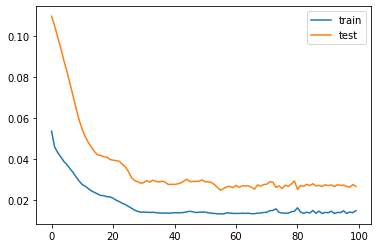

In [91]:
# LSTM
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [92]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, 1:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 1:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSEtest_y
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.060


In [93]:
reframed.shape

(1254, 9)

In [94]:
reframed6 = reframed.values.reshape([209, 6, 9])

In [123]:
values = reframed6
train = values[:180, ...]
test = values[180:, ...]
# split into input and outputs
train_X, train_y = train[..., :-1], train[..., -1]
test_X, test_y = test[..., :-1], test[..., -1]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(180, 6, 8) (180, 6) (29, 6, 8) (29, 6)


Train on 180 samples, validate on 29 samples
Epoch 1/200
 - 1s - loss: 0.0852 - val_loss: 0.1564
Epoch 2/200
 - 0s - loss: 0.0718 - val_loss: 0.1564
Epoch 3/200
 - 0s - loss: 0.0615 - val_loss: 0.1375
Epoch 4/200
 - 0s - loss: 0.0494 - val_loss: 0.1438
Epoch 5/200
 - 0s - loss: 0.0466 - val_loss: 0.1518
Epoch 6/200
 - 0s - loss: 0.0409 - val_loss: 0.1351
Epoch 7/200
 - 0s - loss: 0.0389 - val_loss: 0.1295
Epoch 8/200
 - 0s - loss: 0.0369 - val_loss: 0.1274
Epoch 9/200
 - 0s - loss: 0.0350 - val_loss: 0.1265
Epoch 10/200
 - 0s - loss: 0.0342 - val_loss: 0.1213
Epoch 11/200
 - 0s - loss: 0.0330 - val_loss: 0.1121
Epoch 12/200
 - 0s - loss: 0.0323 - val_loss: 0.1085
Epoch 13/200
 - 0s - loss: 0.0330 - val_loss: 0.1042
Epoch 14/200
 - 0s - loss: 0.0321 - val_loss: 0.0965
Epoch 15/200
 - 0s - loss: 0.0308 - val_loss: 0.0865
Epoch 16/200
 - 0s - loss: 0.0316 - val_loss: 0.0859
Epoch 17/200
 - 0s - loss: 0.0282 - val_loss: 0.0778
Epoch 18/200
 - 0s - loss: 0.0278 - val_loss: 0.0708
Epoch 19/2

Epoch 154/200
 - 0s - loss: 0.0104 - val_loss: 0.0222
Epoch 155/200
 - 0s - loss: 0.0118 - val_loss: 0.0218
Epoch 156/200
 - 0s - loss: 0.0113 - val_loss: 0.0214
Epoch 157/200
 - 0s - loss: 0.0104 - val_loss: 0.0216
Epoch 158/200
 - 0s - loss: 0.0107 - val_loss: 0.0209
Epoch 159/200
 - 0s - loss: 0.0102 - val_loss: 0.0209
Epoch 160/200
 - 0s - loss: 0.0099 - val_loss: 0.0226
Epoch 161/200
 - 0s - loss: 0.0107 - val_loss: 0.0209
Epoch 162/200
 - 0s - loss: 0.0098 - val_loss: 0.0201
Epoch 163/200
 - 0s - loss: 0.0106 - val_loss: 0.0208
Epoch 164/200
 - 0s - loss: 0.0108 - val_loss: 0.0207
Epoch 165/200
 - 0s - loss: 0.0095 - val_loss: 0.0205
Epoch 166/200
 - 0s - loss: 0.0100 - val_loss: 0.0211
Epoch 167/200
 - 0s - loss: 0.0099 - val_loss: 0.0213
Epoch 168/200
 - 0s - loss: 0.0099 - val_loss: 0.0217
Epoch 169/200
 - 0s - loss: 0.0119 - val_loss: 0.0214
Epoch 170/200
 - 0s - loss: 0.0108 - val_loss: 0.0210
Epoch 171/200
 - 0s - loss: 0.0109 - val_loss: 0.0235
Epoch 172/200
 - 0s - loss: 

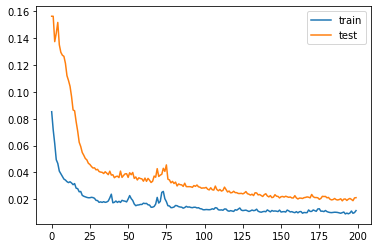

In [140]:
# LSTM
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(32))
model.add(Dense(6))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [141]:
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[..., 1:], yhat[..., None]), axis=-1)
inv_yhat = scaler.inverse_transform(inv_yhat.reshape((-1, 8))).reshape(inv_yhat.shape)
inv_yhat = inv_yhat[...,-1]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[..., 1:], test_y[..., None]), axis=-1)
inv_y = scaler.inverse_transform(inv_y.reshape((-1, 8))).reshape(inv_y.shape)
inv_y = inv_y[...,-1]
# calculate RMSEtest_y
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.043


In [143]:
(300+260+288)/3

282.6666666666667